In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.efficientnet as efn
import tensorflow as tf


In [53]:
train_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/GRAY SCALE DATA/TRAIN/'
valid_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/GRAY SCALE DATA/VALID/'
test_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/GRAY SCALE DATA/TEST/'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=32)


Found 10455 images belonging to 15 classes.


In [54]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=32)

Found 1845 images belonging to 15 classes.


In [55]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=32, shuffle=False)

Found 300 images belonging to 15 classes.


In [56]:
import tensorflow as tf
import tensorflow_hub as hub

model = tf.keras.Sequential([
    hub.KerasLayer(
        'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5',
        trainable=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# Build the model
model.build((None, 224, 224, 3))
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_10 (KerasLayer)  (None, 1280)              4226432   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               163968    
_________________________________________________________________
dense_20 (Dense)             (None, 15)                1935      
Total params: 4,392,335
Trainable params: 4,367,935
Non-trainable params: 24,400
_________________________________________________________________


In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Reshape, GlobalAveragePooling2D, Activation,UpSampling2D, AveragePooling2D



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [58]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=15,
            verbose=1
)

Epoch 1/15
327/327 [==============================] - 1496s 5s/step - loss: 1.7728 - accuracy: 0.5180 - val_loss: 1.3714 - val_accuracy: 0.6509
Epoch 2/15
327/327 [==============================] - 1544s 5s/step - loss: 1.0146 - accuracy: 0.7561 - val_loss: 1.1627 - val_accuracy: 0.7111
Epoch 3/15
327/327 [==============================] - 1335s 4s/step - loss: 0.6747 - accuracy: 0.8682 - val_loss: 1.1828 - val_accuracy: 0.7247
Epoch 4/15
327/327 [==============================] - 1335s 4s/step - loss: 0.4764 - accuracy: 0.9300 - val_loss: 1.2242 - val_accuracy: 0.7301
Epoch 5/15
327/327 [==============================] - 1360s 4s/step - loss: 0.3564 - accuracy: 0.9729 - val_loss: 1.3030 - val_accuracy: 0.7415
Epoch 6/15
327/327 [==============================] - 1373s 4s/step - loss: 0.3212 - accuracy: 0.9801 - val_loss: 1.4029 - val_accuracy: 0.7295
Epoch 7/15
327/327 [==============================] - 1484s 5s/step - loss: 0.2972 - accuracy: 0.9881 - val_loss: 1.4321 - val_accuracy:

KeyboardInterrupt: 

In [59]:
train_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/TRAIN'
valid_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/VALID'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=32)

Found 17640 images belonging to 15 classes.


In [60]:

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=32)

Found 5040 images belonging to 15 classes.


In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [62]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=1
)

Epoch 1/10
552/552 [==============================] - 2436s 4s/step - loss: 1.1934 - accuracy: 0.7184 - val_loss: 0.8534 - val_accuracy: 0.8146
Epoch 2/10
552/552 [==============================] - 2358s 4s/step - loss: 0.7575 - accuracy: 0.8343 - val_loss: 0.7263 - val_accuracy: 0.8520
Epoch 3/10
552/552 [==============================] - 2523s 5s/step - loss: 0.5510 - accuracy: 0.9053 - val_loss: 0.6991 - val_accuracy: 0.8656
Epoch 4/10
552/552 [==============================] - 2456s 4s/step - loss: 0.4192 - accuracy: 0.9477 - val_loss: 0.7212 - val_accuracy: 0.8748
Epoch 5/10
552/552 [==============================] - 2336s 4s/step - loss: 0.3481 - accuracy: 0.9695 - val_loss: 0.7403 - val_accuracy: 0.8873
Epoch 6/10
552/552 [==============================] - 2414s 4s/step - loss: 0.3318 - accuracy: 0.9744 - val_loss: 0.7113 - val_accuracy: 0.8970
Epoch 7/10
552/552 [==============================] - 2459s 4s/step - loss: 0.3152 - accuracy: 0.9790 - val_loss: 0.7381 - val_accuracy:

KeyboardInterrupt: 

In [79]:
test_path = 'C:/Users/Prasanna P M/Human Project/ML_aug/Human Action Recognition/TEST'

In [80]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=32, shuffle=False)

Found 2520 images belonging to 15 classes.


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [90]:
test_labels = test_batches.classes

In [91]:
predictions = model.predict(x=test_batches)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the testing accuracy
testing_accuracy = np.mean(predicted_labels == test_labels)

print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8566666666666667


In [92]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [93]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [94]:
test_batches.class_indices

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

Confusion matrix, without normalization
[[18  0  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0 14  0  0  0  0  2  1  1  0  0  2  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  1  0  3  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  1  0  1  0]
 [ 3  0  0  0  1 13  1  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0 17  0  1  0  0  1]
 [ 0  0  0  0  0  0  2  1  1  0 15  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2 17  0  1]
 [ 0  1  0  0  0  0  0  0  0  1  0  1  0 15  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 19]]


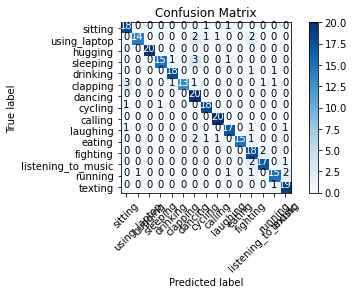

In [95]:
cm_plot_labels = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [96]:
model.save_weights('MobileNetv3_precious_85.h5')

In [97]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [98]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [99]:
TF_LITE_MODEL_FILE_NAME = "MobileNetv3_precious_85.tflite"

In [100]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpqh00z9wj\assets


INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpqh00z9wj\assets


In [101]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4892784

In [102]:
import os
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 4.666 Megabytes


'C:\\Users\\Prasanna P M\\Human Project\\ML_aug\\Human Action Recognition\\GRAY SCALE DATA\\test.zip'